# 通过Gensim训练和使用Word2Vec模型

我们了解了Word2Vec的基本原理和如何通过Skip-gram模型来学习word2vec。实际上除此之外Word2Vec还有一些其它技术细节.
- Cbow模型:从根据一个词的上下文来预测中心词的角度出发构建模型
- Negative Sampling: 通过简化训练过程中的概率计算，从而加速模型训练

[gensim](https://radimrehurek.com/gensim/index.html)能够简化词向量训练相关算法的实现，同时提供了多种有效的功能来管理和应用 Word2Vec 模型，因此成为许多自然语言处理任务中一个高效且可靠的选择。

## 使用Gensim进行词向量的学习

In [ ]:
#!pip install --upgrade gensim
#!pip install tensorboardX

In [1]:
from gensim.models import Word2Vec

sample_sents = [['you', 'say', 'goodbye', 'and', 'I', "say", "hello" '.']]
model = Word2Vec(sentences=sample_sents, vector_size=5, window=1, min_count=1)

| 参数           | 说明                                                                                          |
|----------------|-----------------------------------------------------------------------------------------------|
| sentences     | 原始语料库，单词列表的列表。                                                                  |
| corpus_file   | 当从文件加载语料库时指定，文件格式为每行一个句子，单词之间由空格分隔。                         |
| vector_size   | 向量表示的维度。             |
| window        | 在训练时使用的上下文窗口大小。                                                                |
| min_count     | 用于获得向量表示的单词的最小频率。                                                            |
| workers       | 训练时使用的线程数。                                                                          |
| sg            | 选择训练算法，$1$ 表示使用 skip-gram，$0$ 表示使用 CBOW。 

In [3]:
with open('./Data/lee_background.cor', 'r') as file:
    corpus = file.readlines()

In [4]:
processed_corpus = [line.lower().split() for line in corpus]

In [5]:
model = Word2Vec(
    sentences=processed_corpus,  # 用于训练的语料库
    vector_size=100,             # 词向量的维度
    window=5,                    # 上下文窗口大小
    min_count=5,                 # 忽略出现频率小于5的单词
    sg=1,                        # 1表示使用skip-gram（0表示CBOW）
    negative=5                   # 负采样的样本数量
)

## 使用Gensim进行词向量的操作

由训练生成的模型实例```model```中，单词和单词的分散表示信息被存储在名为```wv```的对象中。此外，它提供了访问和操作训练好的单词向量的主要接口。

单词向量的查看：可以通过 ```model.wv['word']``` 查看特定单词的向量。

In [6]:
model.wv['you']

array([ 1.21364139e-01,  3.73842530e-02,  1.06572703e-01,  3.17449979e-02,
       -7.56473746e-05, -1.85204983e-01,  1.30180314e-01,  3.11880857e-01,
       -1.31044582e-01, -2.00800627e-01, -1.05016410e-01, -2.39488646e-01,
       -1.79136828e-01,  1.82034031e-01, -2.93997098e-02, -1.36869699e-02,
        1.59983307e-01,  6.20281585e-02, -3.42927091e-02, -4.06704247e-01,
       -5.88930547e-02,  5.85456705e-03,  1.45724878e-01, -1.68478921e-01,
       -1.08535260e-01, -7.74289295e-02, -3.95064980e-01, -2.48016357e-01,
       -3.00998539e-02,  5.79219721e-02,  1.67940915e-01, -1.98500697e-02,
        2.73629814e-01, -3.55517447e-01,  2.89780740e-02,  7.16813579e-02,
        2.27782298e-02, -1.22732736e-01, -2.24702403e-01, -2.59456486e-01,
        8.02994519e-02, -1.46794310e-02, -5.18556163e-02,  7.85542950e-02,
        9.12121683e-02, -6.69549033e-02, -2.13250116e-01, -1.09338745e-01,
        9.24382806e-02,  1.21743090e-01, -2.27762330e-02, -7.63119906e-02,
       -1.81810886e-01,  

相似度的计算：可以通过 ```model.wv.similarity('word1', 'word2')``` 计算两个单词之间的相似度。

In [7]:
model.wv.similarity("you", "your")

0.97022206

获取最相似的单词：可以通过 ```model.wv.most_similar('word')``` 获取与特定单词最相似的单词。


In [8]:
model.wv.most_similar("you")

[('do', 0.9935764670372009),
 ("don't", 0.993012547492981),
 ("it's", 0.9921637177467346),
 ('so', 0.9921269416809082),
 ('know', 0.9916104078292847),
 ('"we', 0.9909570217132568),
 ('what', 0.9908595085144043),
 ('can', 0.9906547665596008),
 ('very', 0.9899969696998596),
 ('get', 0.9898061752319336)]

## 使用Gensim进行模型的管理


In [9]:
#model.save("word2vec.model")
#model = Word2Vec.load("word2vec.model")

## 使用预训练模型


In [10]:
import gensim.downloader

print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [11]:
model = gensim.downloader.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
similarity = model.similarity('woman', 'man')
similarity

In [12]:
similarity = model.similarity('woman', 'man')
similarity

0.7664013

In [13]:
model['king']

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

执行向量计算：vec(king) - vec(man) + vec(woman)

In [ ]:
result = model['king'] - model['man'] + model['woman']

similar_words = model.most_similar([result], topn=10)

for word, similarity in similar_words:
    print(f'{word}: {similarity}')


king: 0.8449392914772034
queen: 0.730051577091217
monarch: 0.6454662084579468
princess: 0.6156250834465027
crown_prince: 0.5818676948547363
prince: 0.5777117013931274
kings: 0.561366617679596
sultan: 0.5376775860786438
Queen_Consort: 0.5344247221946716
queens: 0.5289887189865112


## 词向量的可视化


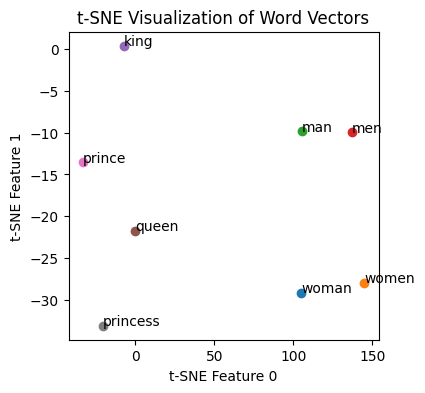

In [15]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np


# List of words to visualize
words = ['woman', 'women', 'man', 'men', 'king', 'queen', 'prince', 'princess']

# Check if the words are in the model to avoid KeyError
vectors = [model[word] for word in words if word in model]

# Converting list of vectors to a numpy array
vectors_array = np.array(vectors)

# Applying t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0, perplexity=3)
vectors_tsne = tsne.fit_transform(vectors_array)

# Visualization
plt.figure(figsize=(4, 4))
for i, word in enumerate(words):
    if word in model:
        plt.scatter(vectors_tsne[i, 0], vectors_tsne[i, 1])
        plt.annotate(word, (vectors_tsne[i, 0], vectors_tsne[i, 1]))

plt.xlabel('t-SNE Feature 0')
plt.ylabel('t-SNE Feature 1')
plt.title('t-SNE Visualization of Word Vectors')
plt.show()

## 使用tensorboard进行可视化


In [20]:
from tensorboardX import SummaryWriter
import torch

weights = model.vectors
labels = model.index_to_key
weights = weights[:1000]
labels = labels[:1000]

执行代码后，数据将会在当前目录中创建。通过在启动 TensorBoard 时指定runs目录,即可以通过TensorBoard查看并交互式地分析数据内容.

In [21]:
writer = SummaryWriter('runs/google_embeddings')
writer.add_embedding(torch.FloatTensor(weights), metadata=labels)

In [ ]:
!tensorboard --logdir=runs